In [2]:
# Code example
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#datapath = 'Jeux_de_donnees/'

# Load the data
country_stats = pd.read_csv("50_Startups.csv", thousands=',')

country_stats

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

In [3]:
X = np.c_[country_stats[["R&D Spend", "Administration", "Marketing Spend"]]]
y = np.array(country_stats["Profit"])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(
        X_test, y_test, test_size=0.5)

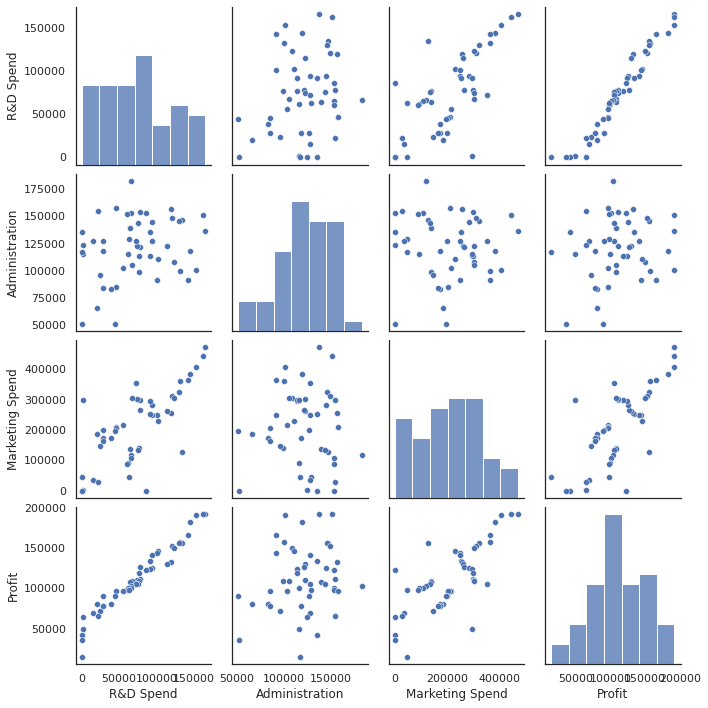

In [5]:
sns.set(style="white", color_codes=True)
sns.pairplot(data=country_stats)
plt.show()

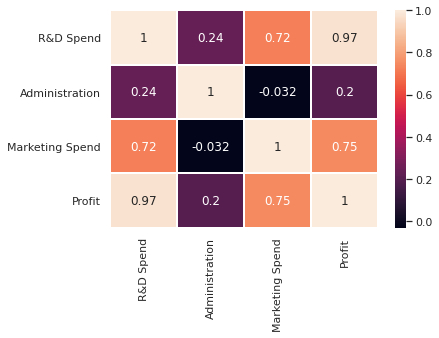

In [6]:
correlation = country_stats.corr()
plt.figure()
plt.subplot(111)
sns.heatmap(correlation, annot=True, linewidths=1.0)
plt.show()

In [7]:
# Select a linear model
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, alpha=0.5))
#model = sklearn.linear_model.SGDRegressor()

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(alpha=0.5))])

In [8]:
metric1 = {'modele': 'model 1',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

In [24]:
metric1

{'modele': 'model 1',
 'mean_absolute_error': 10244.87231838732,
 'mean_squared_error': 175430369.49545962,
 'r2_score': 0.8969912652173904}

## Je teste un deuxième modèle

In [9]:
X = np.c_[country_stats[["R&D Spend", "Marketing Spend"]]]
y = np.array(country_stats["Profit"])

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(
        X_test, y_test, test_size=0.5)

# Select a linear model
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, alpha=0.0001))
#model = sklearn.linear_model.SGDRegressor()

# Train the model
model.fit(X_train, y_train)

metric2 = {'modele': 'model 2',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

In [23]:
metric2

{'modele': 'model 2',
 'mean_absolute_error': 6563.187929954001,
 'mean_squared_error': 54562870.78672725,
 'r2_score': 0.936404753981843}

## Troisième modèle

In [10]:
X = np.c_[country_stats[["Administration", "Marketing Spend"]]]
y = np.array(country_stats["Profit"])

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(
        X_test, y_test, test_size=0.5)

# Select a linear model
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, alpha=0.0001))
#model = sklearn.linear_model.SGDRegressor()

# Train the model
model.fit(X_train, y_train)

metric3 = {'modele': 'model 3',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

In [22]:
metric3

{'modele': 'model 3',
 'mean_absolute_error': 15238.841274315195,
 'mean_squared_error': 534692696.71401864,
 'r2_score': 0.7124027509459858}

## Quatrième modèle

In [11]:
X = np.c_[country_stats[["R&D Spend", "Administration"]]]
y = np.array(country_stats["Profit"])

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(
        X_test, y_test, test_size=0.5)

# Select a linear model
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, alpha=0.0001))
#model = sklearn.linear_model.SGDRegressor()

# Train the model
model.fit(X_train, y_train)

metric4 = {'modele': 'model 4',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

In [25]:
metric4

{'modele': 'model 4',
 'mean_absolute_error': 8855.531350399451,
 'mean_squared_error': 102536130.73806104,
 'r2_score': 0.9212483344145596}

In [12]:
metric = pd.DataFrame([
    metric1, metric2, metric3, metric4])

In [13]:
metric

modele  mean_absolute_error  mean_squared_error  r2_score
0  model 1         10244.872318        1.754304e+08  0.896991
1  model 2          6563.187930        5.456287e+07  0.936405
2  model 3         15238.841274        5.346927e+08  0.712403
3  model 4          8855.531350        1.025361e+08  0.921248

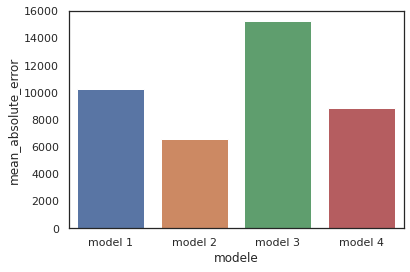

In [14]:
ax = sns.barplot(x="modele", y="mean_absolute_error", data=metric)

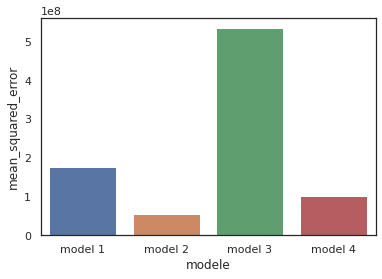

In [15]:
ax = sns.barplot(x="modele", y="mean_squared_error", data=metric)

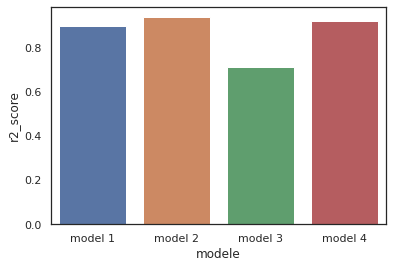

In [16]:
ax = sns.barplot(x="modele", y="r2_score", data=metric)

## Regression polynomial

In [17]:
from sklearn.preprocessing import PolynomialFeatures

X = np.c_[country_stats[["R&D Spend", "Administration", "Marketing Spend"]]]
y = np.array(country_stats["Profit"])

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(
        X_test, y_test, test_size=0.5)

In [26]:
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, include_bias=False),
                     SGDRegressor(max_iter=1000, alpha=0.1))

model.fit(X_train, y_train)

metric_poly = {'modele': 'model_poly',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

In [27]:
metric_poly

{'modele': 'model_poly',
 'mean_absolute_error': 10394.044559514983,
 'mean_squared_error': 154646769.5963133,
 'r2_score': 0.9028626957298319}

In [28]:
model = make_pipeline(StandardScaler(),
                      PolynomialFeatures(degree=4, include_bias=False),
                     SGDRegressor(max_iter=1000, alpha=0.1))

model.fit(X_train, y_train)

metric_poly2 = {'modele': 'model_poly2',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

In [29]:
metric_poly2

{'modele': 'model_poly2',
 'mean_absolute_error': 3599759724322.63,
 'mean_squared_error': 6.668058690007927e+25,
 'r2_score': -4.18836583236382e+16}

## Regression regularisé

#### Modèle Ridge

In [95]:
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000,
                                  alpha=0.1,
                                  penalty = 'l2'))

model.fit(X_train, y_train)

metric_Ridge1 = {'modele': 'model_Ridge1',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

metric_Ridge1

{'modele': 'model_Ridge1',
 'mean_absolute_error': 6783.990653903539,
 'mean_squared_error': 82814684.60064533,
 'r2_score': 0.9113571594020399}

#### Modèle Lasso

In [94]:
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000,
                                  alpha=0.1,
                                  penalty = 'l1'))

model.fit(X_train, y_train)

metric_Lasso1 = {'modele': 'model_Lasso1',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

metric_Lasso1

{'modele': 'model_Lasso1',
 'mean_absolute_error': 5362.276278243982,
 'mean_squared_error': 42057174.94418253,
 'r2_score': 0.9549830145154155}

#### Modèle Elasticnet

In [98]:
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000,
                                  alpha=0.1,
                                  penalty = 'elasticnet',
                                  l1_ratio=0.7))

model.fit(X_train, y_train)

metric_ElasticNet1 = {'modele': 'model_ElasticNet1',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

metric_ElasticNet1

{'modele': 'model_ElasticNet1',
 'mean_absolute_error': 5370.139313088353,
 'mean_squared_error': 42168762.82087571,
 'r2_score': 0.9548635735441182}